# Introduction


##<h2>Title</h2>
Bank Marketing Campaign - Predict Term Deposit (deposito).

selamat datang di project saya, saya Irvan Sikajudin, seorang Data Science enthusiast, project ini berisikan beberapa proses, mulai dari Data Understanding, EDA, Deep dive EDA, Data Prepocessing, Split Data to Train data and Test Data kemudian melatih beberapa model yang dianggap cocok dgn data yang ada,  yakni model K-NN classification, Random Forest, dan Decession Tree.

##<h2>Context and Source</h2>

<h2>Context</h2>
Find the best strategies to improve for the next marketing campaign. How can the financial institution have a greater effectiveness for future marketing campaigns? In order to answer this, we have to analyze the last marketing campaign the bank performed and identify the patterns that will help us find conclusions in order to develop future strategies.<br>

Temukan strategi terbaik untuk ditingkatkan untuk kampanye pemasaran berikutnya. Bagaimana lembaga keuangan memiliki efektivitas yang lebih besar untuk kampanye pemasaran di masa depan? Untuk menjawab ini, kami harus menganalisis kampanye pemasaran terakhir yang dilakukan bank dan mengidentifikasi pola yang akan membantu kami menemukan kesimpulan untuk mengembangkan strategi masa depan.<br>

<h2>Source</h2>
[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

Dataset is about Bank campaign dataset obtained from Kaggle and licensed under CC0: Public Domain.

## Idea of The Project
The idea of ​​this project is to find out the characteristics of a campaign that can be relied on to make customers subscribe to term deposit and predict deposit

The dataset contains order-related columns, look at below for more information about columns

<table>
<thead><tr>
<th>Header</th>
<th>Definition</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>Age</code></td>
<td>Age of customer</td>
</tr>
<tr>
<td><code>Job</code></td>
<td>Job of customer</td>
</tr>
<tr>
<td><code>Martial</code></td>
<td>Martial status of customer  </td>
</tr>
<tr>
<td><code>Education</code></td>
<td>Customer education level</td>
</tr>
<tr>
<td><code>Default</code></td>
<td>Has credit in default?</td>
</tr>
<tr>
<td><code>Housing</code></td>
<td>If costumer has housing loan</td>
</tr>
<tr>
<td><code>Loan</code></td>
<td>Has Personal Loan</td>
</tr>
<tr>
<td><code>Balance</code></td>
<td>Customer's individual balance</td>
</tr>
<tr>
<td><code>Contact</code></td>
<td>Communication type</td>
</tr>
<tr>
<td><code>Month</code></td>
<td>Last contact month of year </td>
</tr>
<tr>
<td><code>Day</code></td>
<td>Last contact day of the week</td>
</tr>
<tr>
<td><code>Duration</code></td>
<td>Last contact duration, in seconds</td>
</tr>
<tr>
<td><code>Campaign</code></td>
<td>Number of contacts performed during this campaign and for this client</td>
</tr>
<tr>
<td><code>Pdays</code></td>
<td>Number of days that passed by after the client was last contacted from a previous campaign</td>
</tr>
<tr>
<td><code>Previous</code></td>
<td>Number of contacts performed before this campaign and for this client</td>
</tr>
<tr>
<td><code>Poutcome</code></td>
<td>outcome of the previous marketing campaign </td>
</tr>
<tr>
<td><code>Deposit</code></td>
<td>has the client subscribed a term deposit</td>
</tr>
</tbody>
</table>

## <h2>Creative Marketing Ideas for Banks:</h2>


*   Location-Based Advertising
*   Gamification in FinTech
*   Make Customer Service Fun!
*   Highlight Success Stories
*   Social Media Personality
*   Partnerships
*   Reward Users for Engagement

# Import Library

In [3]:

import warnings
warnings.filterwarnings('ignore')

import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

from datetime import datetime

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder

In [4]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# Data Collection

In [5]:
# load data from google

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
df = pd.read_csv('/content/drive/MyDrive/final project ds dibimbing.id/bank.csv')
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
df.shape

(11162, 17)

In [6]:
df['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

Target (Deposit) Imbalance. lakukan SMOTE/K-Means SMOTE

# Data Understanding

## General Information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


<!-- **Terdapat 11162 row data dengan 17 fitur dimana saya anggap fitur deposit anggap tidak ada atau tidak memiliki target/output/label agar sesuai dengan judul project ini yakni clustering/segmentation customer,  sehingga pada kasus segmentasi ini akan menggunakan jenis Machine Learning Unsupervised - Clustering**<br> -->
**Terdapat 11162 row data dengan 17 fitur deposit adalah target/output/label **<br>

## Numerical Data

In [8]:
numerics = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
display(df.select_dtypes(include=numerics).columns)
print(df.select_dtypes(include=numerics).shape)
df_num = df.select_dtypes(include=numerics)
df_num.head(3)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

(11162, 7)


,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0


**Dari 16 fitur, terdapat 7 data numerik**

## Non Numerical Data

In [9]:
display(df.select_dtypes(include=['object']).columns)
print(df.select_dtypes(include=object).shape)
df_cat = df.select_dtypes(include=['object'])
df_cat.head(5)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

(11162, 10)


,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,admin.,married,secondary,no,yes,no,unknown,may,unknown,yes
1,admin.,married,secondary,no,no,no,unknown,may,unknown,yes
2,technician,married,secondary,no,yes,no,unknown,may,unknown,yes
3,services,married,secondary,no,yes,no,unknown,may,unknown,yes
4,admin.,married,tertiary,no,no,no,unknown,may,unknown,yes


**Dari 17 fitur, terdapat 10 data non numerik**

# Exploratory Data Analysis (EDA)

## Statistika Deskriptif

### **data numerik**

In [10]:
df_num.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


Observation :


*   95 tahun adalah usia paling tinggi, saya kira masih ada org dgn usia 95 tahun.

*   saya rasa nilai max dan min masuk akal pada semua kolom
*   ada 11162 baris data berdasarkan count, mungkin terdapat data duplikat atau missing value

*   25 % = Q1, 50 % = Q2, 75 % = Q3
*   Mean ~ 50% (Median), semua kolum tidak ada yang memiliki distribusi simetris
*   Mean > 50% (Median), semua kolum memiliki skewed distribution ke kanan/positif
*   Mean ~ 50% (Median), tidak ada kolum dgn skewed negatif/kekiri

### **data non numerik**

In [11]:
df_cat.describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2566,6351,5476,10994,5881,9702,8042,2824,8326,5873


## Univariate Analysis Categorical

In [12]:
rows = []
for col in df_cat :
  rows.append(
        {
            'Nama Kolom': col,
            'Jumlah Unique Values': len(df[col].unique()),
            'Unique Values':  df[col].unique()

        }
  )
# pd.options.display.max_colwidth = 100 #maksimal tampil 100 karakter
pd.options.display.max_colwidth = 70 #maksimal tampil 70 karakter
# pd.options.display.max_colwidth #tanpa batas 
unik = pd.DataFrame(rows)
unik.sort_values(by='Jumlah Unique Values', ascending=False).reset_index().drop('index', 1)


,Nama Kolom,Jumlah Unique Values,Unique Values
0,job,12,"[admin., technician, services, management, retired, blue-collar, u..."
1,month,12,"[may, jun, jul, aug, oct, nov, dec, jan, feb, mar, apr, sep]"
2,education,4,"[secondary, tertiary, primary, unknown]"
3,poutcome,4,"[unknown, other, failure, success]"
4,marital,3,"[married, single, divorced]"
5,contact,3,"[unknown, cellular, telephone]"
6,default,2,"[no, yes]"
7,housing,2,"[yes, no]"
8,loan,2,"[no, yes]"
9,deposit,2,"[yes, no]"


kolom job dan month memiliki values kategori terbanyak.

In [13]:
job = df['job'].value_counts().reset_index()
job.columns = ['job', 'FREQ']
job['PERCENTAGE'] = round((job['FREQ']/job['FREQ'].sum())*100,2)
job = job[0:5]
job.head(10)

,job,FREQ,PERCENTAGE
0,management,2566,22.99
1,blue-collar,1944,17.42
2,technician,1823,16.33
3,admin.,1334,11.95
4,services,923,8.27


In [14]:
marital = df['marital'].value_counts().reset_index()
marital.columns = ['marital', 'FREQ']
marital['PERCENTAGE'] = round((marital['FREQ']/marital['FREQ'].sum())*100,2)
marital = marital[0:10]
marital.head(3)

,marital,FREQ,PERCENTAGE
0,married,6351,56.90
1,single,3518,31.52
2,divorced,1293,11.58


In [15]:
education = df['education'].value_counts().reset_index()
education.columns = ['education', 'FREQ']
education['PERCENTAGE'] = round((education['FREQ']/education['FREQ'].sum())*100,2)
education = education[0:10]
education.head(5)

,education,FREQ,PERCENTAGE
0,secondary,5476,49.06
1,tertiary,3689,33.05
2,primary,1500,13.44
3,unknown,497,4.45


In [16]:
default = df['default'].value_counts().reset_index()
default.columns = ['default', 'FREQ']
default['PERCENTAGE'] = round((default['FREQ']/default['FREQ'].sum())*100,2)
default = default[0:10]
default.head(5)

,default,FREQ,PERCENTAGE
0,no,10994,98.49
1,yes,168,1.51


In [17]:
housing = df['housing'].value_counts().reset_index()
housing.columns = ['housing', 'FREQ']
housing['PERCENTAGE'] = round((housing['FREQ']/housing['FREQ'].sum())*100,2)
housing = housing[0:10]
housing.head(5)

,housing,FREQ,PERCENTAGE
0,no,5881,52.69
1,yes,5281,47.31


In [18]:
loan = df['loan'].value_counts().reset_index()
loan.columns = ['loan', 'FREQ']
loan['PERCENTAGE'] = round((loan['FREQ']/loan['FREQ'].sum())*100,2)
loan = loan[0:10]
loan.head(5)

,loan,FREQ,PERCENTAGE
0,no,9702,86.92
1,yes,1460,13.08


In [19]:
contact = df['contact'].value_counts().reset_index()
contact.columns = ['contact', 'FREQ']
contact['PERCENTAGE'] = round((contact['FREQ']/contact['FREQ'].sum())*100,2)
contact = contact[0:10]
contact.head(5)

,contact,FREQ,PERCENTAGE
0,cellular,8042,72.05
1,unknown,2346,21.02
2,telephone,774,6.93


In [20]:
month = df['month'].value_counts().reset_index()
month.columns = ['month', 'FREQ']
month['PERCENTAGE'] = round((month['FREQ']/month['FREQ'].sum())*100,2)
month = month[0:10]
month.head(5)

,month,FREQ,PERCENTAGE
0,may,2824,25.30
1,aug,1519,13.61
2,jul,1514,13.56
3,jun,1222,10.95
4,nov,943,8.45


In [21]:
poutcome = df['poutcome'].value_counts().reset_index()
poutcome.columns = ['poutcome', 'FREQ']
poutcome['PERCENTAGE'] = round((poutcome['FREQ']/poutcome['FREQ'].sum())*100,2)
poutcome = poutcome[0:10]
poutcome.head(5)

,poutcome,FREQ,PERCENTAGE
0,unknown,8326,74.59
1,failure,1228,11.00
2,success,1071,9.60
3,other,537,4.81


In [22]:
deposit = df['deposit'].value_counts().reset_index()
deposit.columns = ['deposit', 'FREQ']
deposit['PERCENTAGE'] = round((deposit['FREQ']/deposit['FREQ'].sum())*100,2)
deposit = deposit[0:10]
deposit.head(5)

,deposit,FREQ,PERCENTAGE
0,no,5873,52.62
1,yes,5289,47.38


In [23]:
df_cat.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

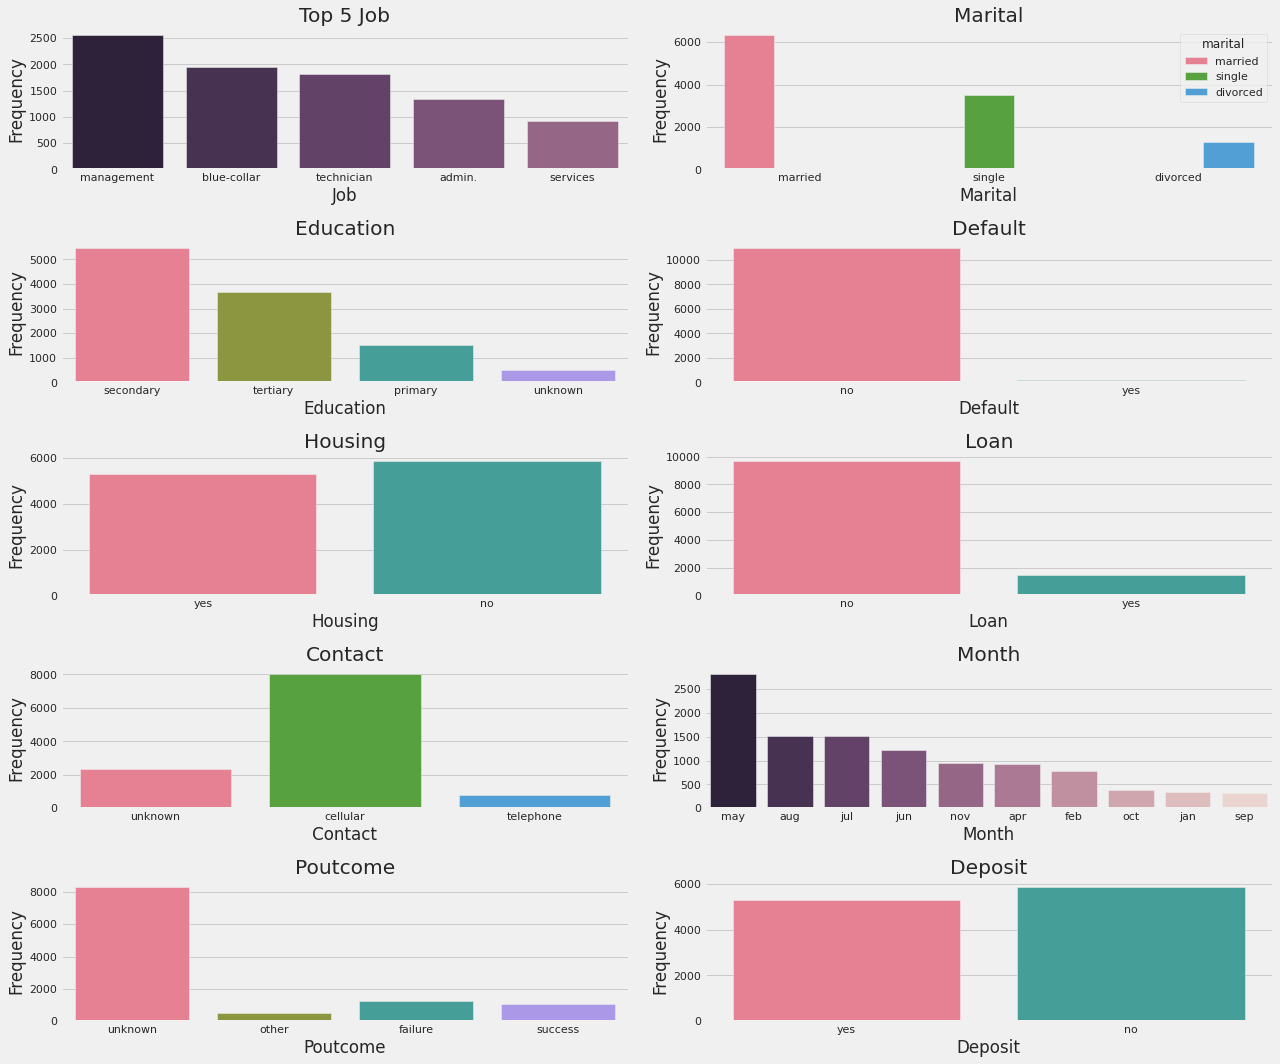

In [24]:
# cat_feature = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','month', 'poutcome', 'deposit']
cat_feature = df_cat.columns

f,ax = plt.subplots(5,2,figsize=(18,15))


g = sns.barplot(x='job', y ='FREQ', data=job, ax=ax[0,0], palette=sns.cubehelix_palette(reverse=True, start=0, n_colors=10))
ax[0,0].set_title('Top 5 Job')
ax[0,0].set_xlabel('Job')
ax[0,0].set_ylabel('Frequency')

g = sns.countplot('marital',data=df, hue = 'marital', palette='husl', ax=ax[0,1])
ax[0,1].set_title('Marital')
ax[0,1].set_xlabel('Marital')
ax[0,1].set_ylabel('Frequency')

g = sns.countplot('education',data=df,palette='husl', ax=ax[1,0])
ax[1,0].set_title('Education')
ax[1,0].set_xlabel('Education')
ax[1,0].set_ylabel('Frequency')

# g = sns.barplot(x='default', y ='FREQ', data=default, ax=ax[1,1], palette=sns.cubehelix_palette(reverse=True, start=0, n_colors=10))
g = sns.countplot('default',data=df,palette='husl', ax=ax[1,1])
ax[1,1].set_title('Default')
ax[1,1].set_xlabel('Default')
ax[1,1].set_ylabel('Frequency')

g = sns.countplot('housing',data=df,palette='husl', ax=ax[2,0])
ax[2,0].set_title('Housing')
ax[2,0].set_xlabel('Housing')
ax[2,0].set_ylabel('Frequency')

g = sns.countplot('loan',data=df,palette='husl', ax=ax[2,1])
ax[2,1].set_title('Loan')
ax[2,1].set_xlabel('Loan')
ax[2,1].set_ylabel('Frequency')

g = sns.countplot('contact',data=df,palette='husl', ax=ax[3,0])
ax[3,0].set_title('Contact')
ax[3,0].set_xlabel('Contact')
ax[3,0].set_ylabel('Frequency')

g = sns.barplot(x='month', y ='FREQ', data=month, ax=ax[3,1], palette=sns.cubehelix_palette(reverse=True, start=0, n_colors=10))
# g = sns.countplot('month',data=df,palette='husl', ax=ax[3,1])
ax[3,1].set_title('Month')
ax[3,1].set_xlabel('Month')
ax[3,1].set_ylabel('Frequency')

g = sns.countplot('poutcome',data=df,palette='husl', ax=ax[4,0])
ax[4,0].set_title('Poutcome')
ax[4,0].set_xlabel('Poutcome')
ax[4,0].set_ylabel('Frequency')

g = sns.countplot('deposit',data=df,palette='husl', ax=ax[4,1])
ax[4,1].set_title('Deposit')
ax[4,1].set_xlabel('Deposit')
ax[4,1].set_ylabel('Frequency')


plt.tight_layout()

## Univariate Analysis Numeric

### Box Plot

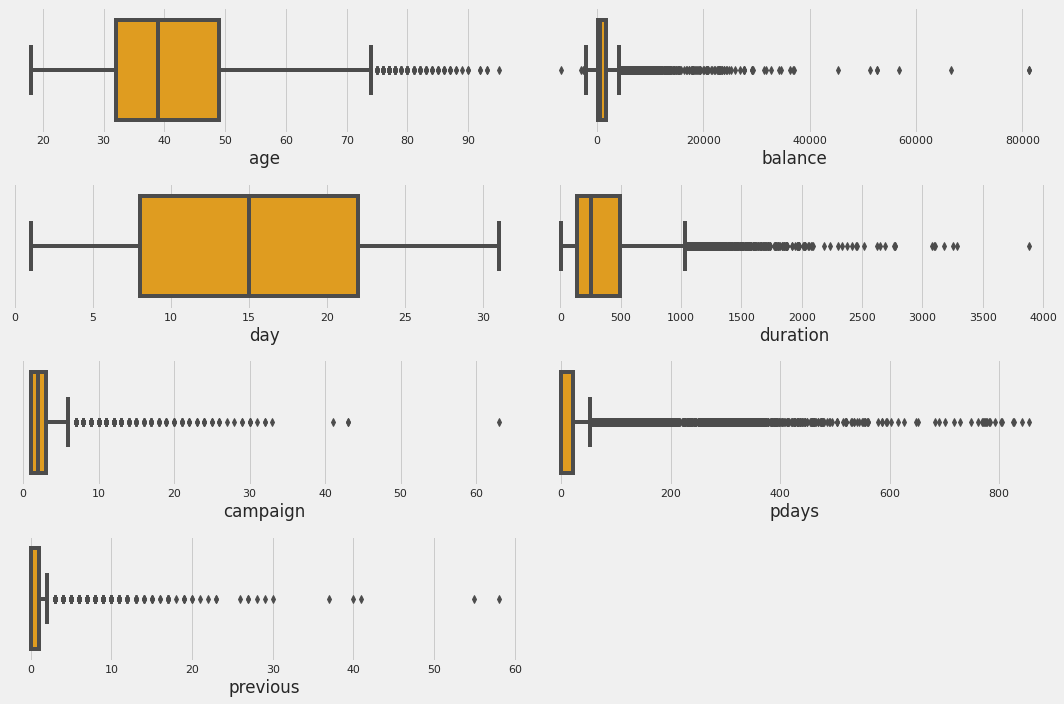

In [25]:
# boxplot visualization for numerical data

numericals = df_num.columns

plt.figure(figsize=(15, 10))
for i in range(0, len(numericals)):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x=df[numericals[i]], color='orange')
    plt.tight_layout()

plt.show()

Dari pengamatan plot kotak/box plot:

hanya kolom day yang tidak memiliki outliers,
berdasarkan literatur Keberadaan outlier pada dataset dapat menyebabkan rendahnya hasil akurasi pada proses
klasifikasi. Outlier pada dataset dapat dihilangkan
pada tahapan prapemrosesan algoritme klasifikasi, Sinaga dkk. [(Sumber)](https://iopscience.iop.org/article/10.1088/1757-899X/725/1/012122) menyatakan adanya pengaruh outlier
pada klasifikasi algoritme kNN dan mengusulkan
sebuah metode dengan cara mengkombinasikan
beberapa tahapan pada vektor rata-rata lokal kNN dan
jarak harmonic sebagai label untuk data uji. Metode
tersebut dapat meningkatkan hasil akurasi klasifikasi
kNN pada dataset yang memiliki outlier. Alternatif lain
agar akurasi hasil klasifikasi meningkat adalah dengan
menghilangkan outlier pada dataset sebelum proses
(prapemrosesan) klasifikasi

### Dist Plot / Distribustion plot

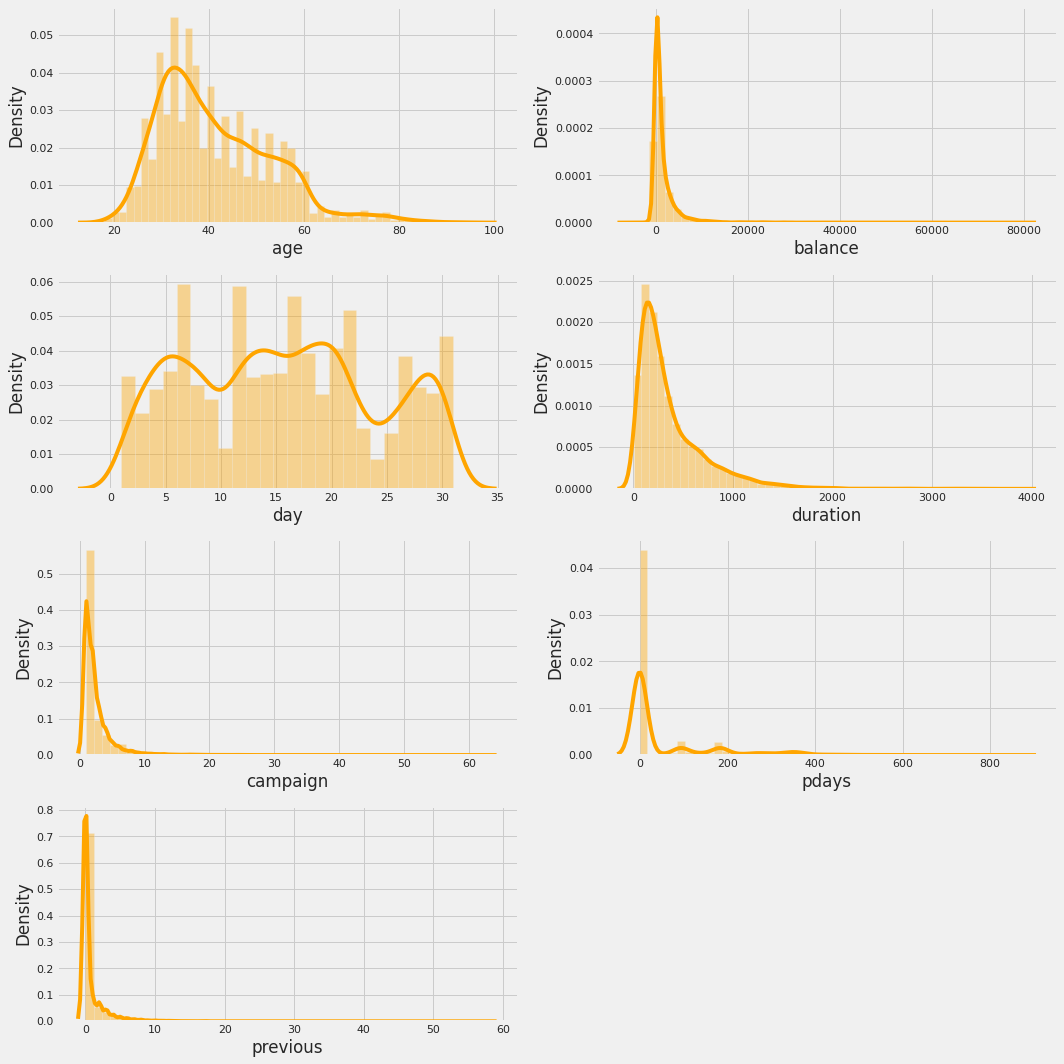

In [26]:
# distribution plot for numerical data

plt.figure(figsize=(15, 15))
for i in range(0, len(numericals)):
    plt.subplot(4, 2,i+1)
    sns.distplot(df[numericals[i]], color='orange')
    plt.tight_layout()

Dari pengamatan Dist Plot:

semua kolom tampaknya memiliki distribusi miring positif, kolom DAY tanpak seperti memiliki distribusi simetris namun jika dilihat pada satistik deskriftif day menunjukkan miring positif (skewed positif)

## Multivariate Analysis

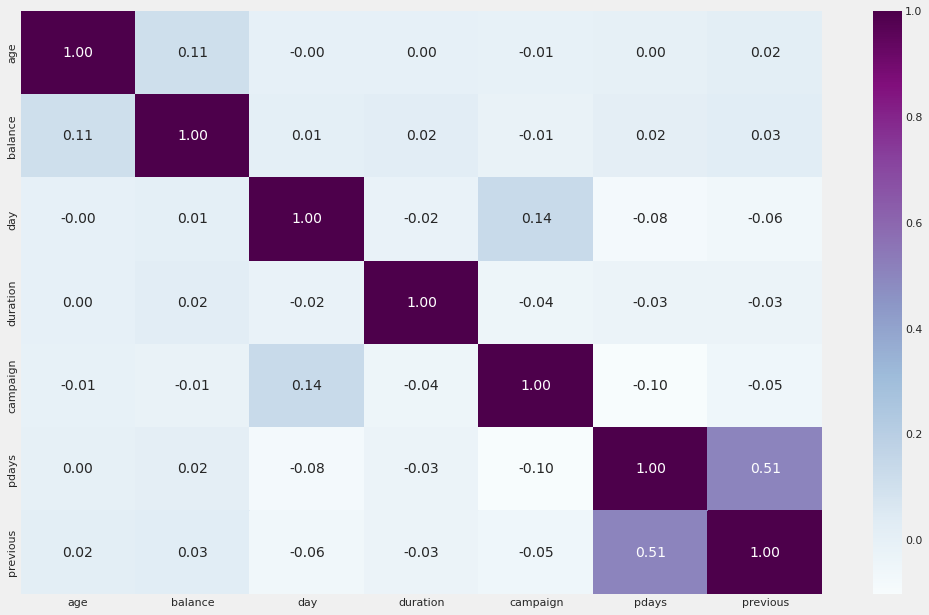

In [27]:
corr_= df_num.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu")

hubungan antar variabel tidak lebih dari 51 % menunjukkan kecil kemungkinan multikoliniearitas

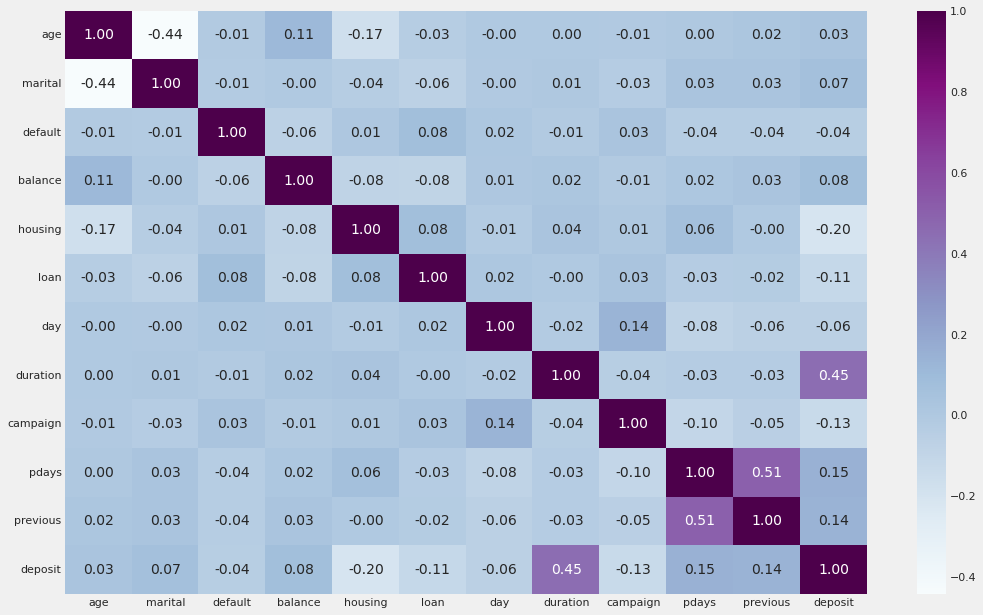

In [10]:
corr_= df.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu")

hubungan deposit dan campaign adalah terbalik, dimana semakin campaign (semakin banyak dihubungi) maka peluang pelanggan melakukan term deposit semakin mengecil

<Figure size 1152x720 with 0 Axes>

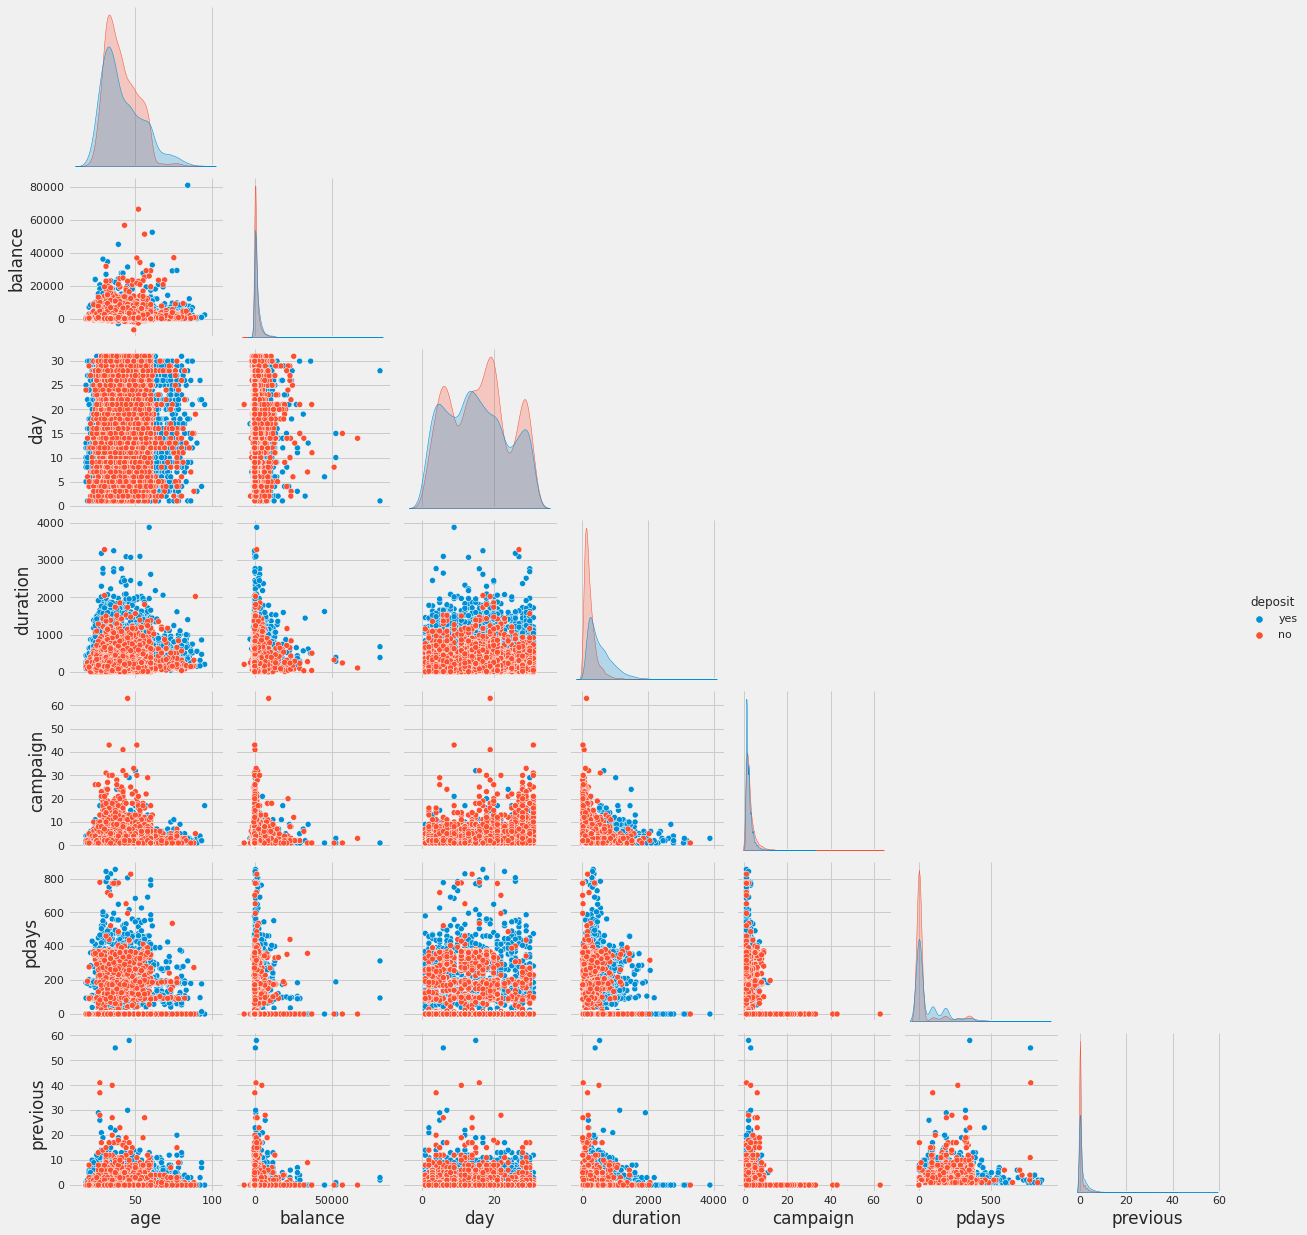

In [28]:
plt.figure(figsize=(16,10))
sns.pairplot(df,hue='deposit',corner=True)

sekilas terlihat pada beberpa fitur lebih banyak yang tidak melakukan term deposit

In [2]:
plt.figure(figsize=(16,10))
sns.pairplot(df,hue='Campaign',corner=True)

NameError: ignored

In [29]:
import plotly.express as px

In [30]:
import plotly.express as px
sample  = df.rename(columns={"balance":"Active Balance","job":"Occupation"})
fig = px.treemap(sample, path=[px.Constant('Active Balance'),'Occupation'], values='Active Balance',
                   hover_data=['Occupation'])
fig.show()

In [31]:
df.loc[df['job'] == 'management', 'balance'].sum()

4602541

dapat dilihat dari treemap diatas bahwa profesi management memiliki kemunngkinan tertinggi untuk melakukan term deposit karena memiliki saldo yang paling banyak sebesar 4602541 secara total

In [32]:
sample  = df.rename(columns={"balance":"Active Balance","marital":"Status Pernikahan"})
fig = px.treemap(sample, path=[px.Constant('Active Balance'),'Status Pernikahan'], values='Active Balance',
                   hover_data=['Status Pernikahan'])
fig.show()

dapat dilihat dari treemap diatas bahwa seorang yang memiliki status nikah memiliki kemunngkinan tertinggi untuk melakukan term deposit karena memiliki saldo yang paling banyak sebesar 10161140 secara total

In [33]:
sample  = df.rename(columns={"balance":"Active Balance","age":"Umur"})
fig = px.treemap(sample, path=[px.Constant('Active Balance'),'Umur'], values='Active Balance',
                   hover_data=['Umur'])
fig.show()

dapat dilihat dari treemap diatas bahwa umur skitar 30 an serta yang status married memiliki kemunngkinan tertinggi untuk melakukan deposit

In [34]:
sample  = df.rename(columns={"balance":"Active Balance","education":"Pendidikan"})
fig = px.treemap(sample, path=[px.Constant('Active Balance'),'Pendidikan'], values='Active Balance',
                   hover_data=['Pendidikan'])
fig.show()

dapat dilihat dari treemap diatas bahwa pendidikan pada tingkat secondary memiliki kemunngkinan tertinggi untuk melakukan deposit karena balancenya paling tinggi pada kategori secondary

In [35]:
sample  = df.rename(columns={"balance":"Active Balance","loan":"Loans"})
fig = px.treemap(sample, path=[px.Constant('Active Balance'),'Loans'], values='Active Balance',
                   hover_data=['Loans'])
fig.show()

dapat dilihat dari treemap diatas bahwa orang yang tidak memiliki loan memiliki kemunngkinan tertinggi untuk melakukan deposit karna balance/saldonya sangat besar daripada yang mimiliki loan(pinjaman)

# Data Preprocessing

## Missing Values

In [36]:
data = df

In [37]:
data_missing_value = data.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(data))*100,2)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage


Tidak ada mising value pada dataset, lanjut cek duplikat

## Duplicate Values

In [38]:
data.duplicated().sum()

0

Tidak ada duplicates rows pada dataset.

## Label Encoding

In [39]:
df = data

In [40]:
df_cat.describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2566,6351,5476,10994,5881,9702,8042,2824,8326,5873


In [41]:
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder

In [9]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'marital'.
df['marital']= label_encoder.fit_transform(df['marital'])
df['housing']= label_encoder.fit_transform(df['housing'])
df['deposit']= label_encoder.fit_transform(df['deposit']) 
df['loan']= label_encoder.fit_transform(df['loan']) 
df['default']= label_encoder.fit_transform(df['default']) 



In [43]:
rows = []
for col in df :
  rows.append(
        {
            'Nama Kolom': col,
            'Jumlah Unique Values': len(df[col].unique()),
            'Unique Values':  df[col].unique()

        }
  )
# pd.options.display.max_colwidth = 100 #maksimal tampil 100 karakter
pd.options.display.max_colwidth = 70 #maksimal tampil 70 karakter
# pd.options.display.max_colwidth #tanpa batas 
unik = pd.DataFrame(rows)
unik.sort_values(by='Jumlah Unique Values', ascending=True).reset_index().drop('index', 1)


,Nama Kolom,Jumlah Unique Values,Unique Values
0,deposit,2,"[1, 0]"
1,loan,2,"[0, 1]"
2,housing,2,"[1, 0]"
3,default,2,"[0, 1]"
4,contact,3,"[unknown, cellular, telephone]"
5,marital,3,"[1, 2, 0]"
6,poutcome,4,"[unknown, other, failure, success]"
7,education,4,"[secondary, tertiary, primary, unknown]"
8,job,12,"[admin., technician, services, management, retired, blue-collar, u..."
9,month,12,"[may, jun, jul, aug, oct, nov, dec, jan, feb, mar, apr, sep]"


In [44]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,1,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,1,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,1,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,1,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,1,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1


## One Hot Encoding

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  int64 
 3   education  11162 non-null  object
 4   default    11162 non-null  int64 
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  int64 
 7   loan       11162 non-null  int64 
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  int64 
dtypes: int64(12), object(5)
memory usage: 1.4+ MB


In [46]:
# lihat sekilas hasil One hot encode column 'job','education', 'contact', 'month', 'poutcome' dan definisikan ke one_hot_columns
one_hot_columns = pd.get_dummies(df[['job','education', 'contact', 'month', 'poutcome']])

#kode singkat dari kode di atas
# one_hot_columns = pd.get_dummies(object_columns)

In [47]:
# kolom kolom yang berada dalam one_hot_columns   ingin di one hot encoding
dumies_one_hot_encod = one_hot_columns 

# bagian one hot encoding dari kolom Contract dan PaymenMethod
df_updated = pd.concat([df, dumies_one_hot_encod], axis = 1)

# # hapus kolom yang berada di dalam one_hot_columns  dari dataframe awal
df_updated.drop(['job','education', 'contact', 'month', 'poutcome'], axis = 1, inplace = True)

df_updated.head()

,age,marital,default,balance,housing,loan,day,duration,campaign,pdays,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,1,0,2343,1,0,5,1042,1,-1,...,0,0,1,0,0,0,0,0,0,1
1,56,1,0,45,0,0,5,1467,1,-1,...,0,0,1,0,0,0,0,0,0,1
2,41,1,0,1270,1,0,5,1389,1,-1,...,0,0,1,0,0,0,0,0,0,1
3,55,1,0,2476,1,0,5,579,1,-1,...,0,0,1,0,0,0,0,0,0,1
4,54,1,0,184,0,0,5,673,2,-1,...,0,0,1,0,0,0,0,0,0,1


In [48]:
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 47 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  11162 non-null  int64
 1   marital              11162 non-null  int64
 2   default              11162 non-null  int64
 3   balance              11162 non-null  int64
 4   housing              11162 non-null  int64
 5   loan                 11162 non-null  int64
 6   day                  11162 non-null  int64
 7   duration             11162 non-null  int64
 8   campaign             11162 non-null  int64
 9   pdays                11162 non-null  int64
 10  previous             11162 non-null  int64
 11  deposit              11162 non-null  int64
 12  job_admin.           11162 non-null  uint8
 13  job_blue-collar      11162 non-null  uint8
 14  job_entrepreneur     11162 non-null  uint8
 15  job_housemaid        11162 non-null  uint8
 16  job_management       1

In [49]:
df_updated.head(5)

,age,marital,default,balance,housing,loan,day,duration,campaign,pdays,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,1,0,2343,1,0,5,1042,1,-1,...,0,0,1,0,0,0,0,0,0,1
1,56,1,0,45,0,0,5,1467,1,-1,...,0,0,1,0,0,0,0,0,0,1
2,41,1,0,1270,1,0,5,1389,1,-1,...,0,0,1,0,0,0,0,0,0,1
3,55,1,0,2476,1,0,5,579,1,-1,...,0,0,1,0,0,0,0,0,0,1
4,54,1,0,184,0,0,5,673,2,-1,...,0,0,1,0,0,0,0,0,0,1


# Choose the appropriate metric for fitting the model

In [50]:
# It's important to choose the right metric when doing classification
df_updated['deposit'].value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

observasi ⤵

Distribusi kelas adalah Balance, menggunakan akurasi. 
tapi sebanarnya saya bimbang ini termasuk balance atau tidak karena ada perbedaan, mohon jawabannya mentor .. namun saat ini saya akan menggunakan AUC

# Penentuan Metrik



*   Akurasi
*   - Evaluasi ketika memiliki balanced data

*   Precision
*   - Biasa digunakan ketika lebih memperhatikan jumlah False positif (FP) yang sebaiknya lebih sedikit.
*   - Contoh kasus : deteksi spam pada email

*   Recall
*   - Jika kita tidak memperbolehkan nilai False Negatif (FN) yang besar
*   - Contoh kasus : Deteksi penyakit kanker

*   F1 score 
*   - merangkum precision dan  recall dengan mengambil RATAAN HARMONIK dari keduanya
*   - F1 score dapat diterapkan pada data imbalance


*   AUC 
*   - mirip akurasi tapi dapat dapat diterapkan pada data imbalance




# SMOTE method

In [51]:
# Smote/K-means smote

In [52]:
from imblearn import under_sampling, over_sampling

X = df_updated.drop(['deposit'],axis=1)
y = df_updated['deposit']

# Undersampling
X_under, y_under = under_sampling.RandomUnderSampler().fit_resample(X, y)

# Overampling
X_over, y_over = over_sampling.RandomOverSampler().fit_resample(X, y)

# Overampling with smote
X_over_smote, y_over_smote = over_sampling.SMOTE().fit_resample(X, y)

In [57]:
df_oversampling_smote = pd.concat([X_over_smote, y_over_smote], axis=1)
df_oversampling_smote.head(3)

,age,marital,default,balance,housing,loan,day,duration,campaign,pdays,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,deposit
0,59,1,0,2343,1,0,5,1042,1,-1,...,0,1,0,0,0,0,0,0,1,1
1,56,1,0,45,0,0,5,1467,1,-1,...,0,1,0,0,0,0,0,0,1,1
2,41,1,0,1270,1,0,5,1389,1,-1,...,0,1,0,0,0,0,0,0,1,1


In [58]:
df_oversampling_smote['deposit'].value_counts()

1    5873
0    5873
Name: deposit, dtype: int64

In [60]:
df_oversampling_smote.shape

(11746, 47)

In [62]:
a = 11746-11162
b = a + 5873 + 5289
print(b)

11746


# Split the data: training & testing

In [63]:
# gunakan ini jika data imbalance, menggunakan smote over sampling
from sklearn.model_selection import train_test_split

X = df_oversampling_smote.drop(columns='deposit')
y = df_oversampling_smote[['deposit']]
X_train, X_test, y_train, y_test = train_test_split(X_over_smote, y_over_smote, test_size=0.20, random_state=42)

In [ ]:
# # as always, first thing is to split the data - balance data
# from sklearn.model_selection import train_test_split

# X = df_updated.drop(columns='deposit')
# y = df_updated[['deposit']]


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Train any classification model you’d prefer
○ YET please ensure you do hyperparameter tuning

## K-NN Classification

In [64]:
# define the estimator/model
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

In [71]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_neighbors': (2,3,4,5,6,7,8)
}

knn_clf_gridcv = GridSearchCV(knn_clf, parameters, cv=5, scoring='roc_auc')
knn_clf_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (2, 3, 4, 5, 6, 7, 8)},
             scoring='roc_auc')

In [72]:
# the compact results
cv_result = pd.DataFrame(knn_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,{'n_neighbors': 2},0.775082,7
1,{'n_neighbors': 3},0.795145,6
2,{'n_neighbors': 4},0.806867,5
3,{'n_neighbors': 5},0.813362,4
4,{'n_neighbors': 6},0.817080,3
5,{'n_neighbors': 7},0.819836,2
6,{'n_neighbors': 8},0.822606,1


observasi ⤵

kalo di rata -ratakan nilai mean_test_score (metode roc_auc) diatas 50 % tergolong cukup tinggi

In [73]:
# what if we also want to tune "weights" hyperparameter
# "uniform": all K neighbors have the same influence
# "distance": closer neighbor in those K neighbors has stronger influence
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_neighbors': (2,3,4,5,6,7,8),
    'weights':('uniform','distance')
}

# now we use recall (sensitivity) as metric
knn_clf_gridcv = GridSearchCV(knn_clf, parameters, cv=5, scoring='roc_auc')
knn_clf_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (2, 3, 4, 5, 6, 7, 8),
                         'weights': ('uniform', 'distance')},
             scoring='roc_auc')

In [74]:
# the results
cv_result = pd.DataFrame(knn_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
13,"{'n_neighbors': 8, 'weights': 'distance'}",0.831620,1
11,"{'n_neighbors': 7, 'weights': 'distance'}",0.828646,2
9,"{'n_neighbors': 6, 'weights': 'distance'}",0.825640,3
12,"{'n_neighbors': 8, 'weights': 'uniform'}",0.822606,4
7,"{'n_neighbors': 5, 'weights': 'distance'}",0.821032,5
10,"{'n_neighbors': 7, 'weights': 'uniform'}",0.819836,6
8,"{'n_neighbors': 6, 'weights': 'uniform'}",0.817080,7
5,"{'n_neighbors': 4, 'weights': 'distance'}",0.814582,8
6,"{'n_neighbors': 5, 'weights': 'uniform'}",0.813362,9
4,"{'n_neighbors': 4, 'weights': 'uniform'}",0.806867,10


observasi ⤵

model yang paling bagus menggunakan n_neighbors = 8 dan weights = distance,

### Evaluate the model on test data

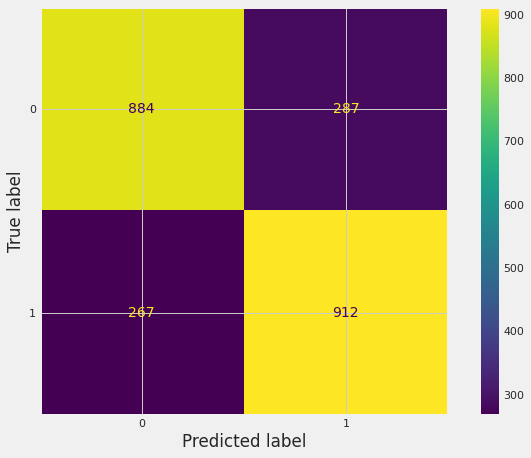

In [75]:
# plotting confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = knn_clf_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=knn_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=knn_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

observasi ⤵

*   sebanyak 287 diprediksi deposit tapi sebenarnya tidak deposit
*   sebanyak 267 diprediksi tidak deposit tapi sebenarnya deposit
</br></br>
*   true positif/berhasil memprediksi deposit = 912
*   true negatif/berhasil memprediksi tidak deposit = 884 
*   false positif/deposit yg tidak berhasil diprediksi  = 287
*   false negatif/tidak deposit yg tidak berhasil diprediksi = 267


In [76]:
# classification report
from sklearn.metrics import classification_report
y_pred = knn_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1171
           1       0.76      0.77      0.77      1179

    accuracy                           0.76      2350
   macro avg       0.76      0.76      0.76      2350
weighted avg       0.76      0.76      0.76      2350



observasi ⤵

Data Imbalace -> Gunakan F1-score/AUC sebagai metric</br>(kurang yakin, mentor tulong dikoreksi)</br></br>

precision = dari data point yang diprediksi deposit oleh model skitar 76  persen saja yang benar benar deposit.

recall = dari orang yang betul-betul deposit model berhasil menangkap 77 persen diantaranya.

### Kesimpulan KNN

KNN model di test saya lebih dari 50%, saya rasa tidak perlu ganti model, tapi akan saya coba dengan model lainnya

## Random Forest

In [77]:
# the usual splitting 
from sklearn.model_selection import train_test_split

X = df_updated.drop(columns='deposit').to_numpy()
y = df_updated[['deposit']].to_numpy()
y = y.reshape(len(y),)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [78]:
# define random forest classifier model
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)

In [79]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

# note: we use recall
rf_clf_gridcv = GridSearchCV(rf_clf, parameters, cv=5, scoring='roc_auc')
rf_clf_gridcv.fit(X_train, y_train)

CPU times: user 14.6 s, sys: 158 ms, total: 14.8 s
Wall time: 14.8 s


menggunakan GridSearchCv secara utuh membutuhkan waktu > 14.8 seconds to finish

In [80]:
# the results
cv_result = pd.DataFrame(rf_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
23,"{'max_depth': 5, 'n_estimators': 40}",0.892567,1
24,"{'max_depth': 5, 'n_estimators': 50}",0.891900,2
22,"{'max_depth': 5, 'n_estimators': 30}",0.889228,3
21,"{'max_depth': 5, 'n_estimators': 20}",0.885343,4
19,"{'max_depth': 4, 'n_estimators': 50}",0.882830,5
18,"{'max_depth': 4, 'n_estimators': 40}",0.875166,6
20,"{'max_depth': 5, 'n_estimators': 10}",0.873026,7
17,"{'max_depth': 4, 'n_estimators': 30}",0.860816,8
14,"{'max_depth': 3, 'n_estimators': 50}",0.857877,9
16,"{'max_depth': 4, 'n_estimators': 20}",0.850869,10


If we want to speed up the training process, we may use RandomizedSearchCV

In [81]:
%%time
# using random search CV
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

rf_clf_randomcv = RandomizedSearchCV(rf_clf, parameters, cv=5, 
                                     scoring='roc_auc', n_iter=10)
rf_clf_randomcv.fit(X_train, y_train)

CPU times: user 6.38 s, sys: 57.9 ms, total: 6.43 s
Wall time: 6.43 s


Now it only takes way less seconds (compared to > 9 seconds when using the full GridSearchCV)

In [82]:
# results of RandomSearchCV
cv_result = pd.DataFrame(rf_clf_randomcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
6,"{'n_estimators': 30, 'max_depth': 5}",0.889228,1
2,"{'n_estimators': 50, 'max_depth': 4}",0.882830,2
5,"{'n_estimators': 40, 'max_depth': 4}",0.875166,3
7,"{'n_estimators': 40, 'max_depth': 3}",0.850864,4
0,"{'n_estimators': 30, 'max_depth': 3}",0.842641,5
4,"{'n_estimators': 40, 'max_depth': 2}",0.834863,6
1,"{'n_estimators': 30, 'max_depth': 2}",0.824222,7
8,"{'n_estimators': 10, 'max_depth': 3}",0.819201,8
9,"{'n_estimators': 40, 'max_depth': 1}",0.805794,9
3,"{'n_estimators': 10, 'max_depth': 1}",0.763172,10


Observasi :</br>

walaupun menggunakan RandomSearchCV mean_test_score berkurang dari 0.892567 menjadi  0.889228	,tetap saya anggap lebih baik menggunakan GridSearchCv karena akan menghemat waktu perhitungan/computasi dan biaya operasional nantinya

### Evaluate the model on test data

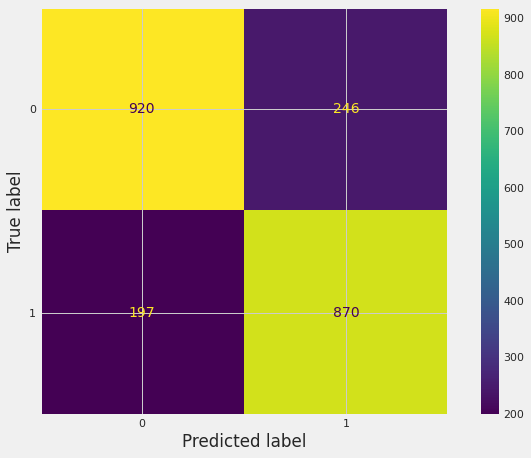

In [83]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = rf_clf_randomcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=rf_clf_randomcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_clf_randomcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

observasi ⤵

*   sebanyak 246 diprediksi deposit tapi sebenarnya tidak deposit
*   sebanyak 197 diprediksi tidak deposit tapi sebenarnya deposit
</br></br>
*   true positif/berhasil memprediksi deposit = 870
*   true negatif/berhasil memprediksi tidak deposit = 920 
*   false positif/deposit yg tidak berhasil diprediksi  = 246
*   false negatif/tidak deposit yg tidak berhasil diprediksi = 197


In [84]:
# classification report
from sklearn.metrics import classification_report
y_pred = rf_clf_randomcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1166
           1       0.78      0.82      0.80      1067

    accuracy                           0.80      2233
   macro avg       0.80      0.80      0.80      2233
weighted avg       0.80      0.80      0.80      2233



Recall dan precision (82 % dan 78%)  better than our previous K-NN model!</br>
F1-score 80 %


## Decision Tree

In [85]:
# the usual splitting 
from sklearn.model_selection import train_test_split

X = df_updated.drop(columns='deposit').to_numpy()
y = df_updated[['deposit']].to_numpy()
y = y.reshape(len(y),)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [86]:
# define random forest classifier model
from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier

rf_clf = DecisionTreeClassifier()
# rf_clf = RandomForestClassifier(random_state=42)

In [87]:
%%time
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion': ['gini', 'entropy'],  #scoring methodology; two supported formulas for calculating information gain - default is gini
              'splitter': ['best', 'random'], #splitting methodology; two supported strategies - default is best
              'max_depth': [2,4,6,8,10,None], #max depth tree can grow; default is none
              'min_samples_split': [2,5,10,.03,.05], #minimum subset size BEFORE new split (fraction is % of total); default is 2
              'min_samples_leaf': [1,5,10,.03,.05], #minimum subset size AFTER new split split (fraction is % of total); default is 1
              'max_features': [None, 'auto'], #max features to consider when performing split; default none or all
              'random_state': [0] #seed or control random number generator
             }

rf_clf_gridcv  = GridSearchCV(rf_clf, 
                          param_grid=param_grid, 
                          scoring = 'roc_auc',
                          cv = 5,
                          verbose=0)
rf_clf_gridcv.fit(X_train, y_train)

CPU times: user 1min 47s, sys: 886 ms, total: 1min 48s
Wall time: 1min 48s


It takes > 1min 48s seconds to finish

In [88]:
# the results
cv_result = pd.DataFrame(rf_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
1117,"{'criterion': 'entropy', 'max_depth': None, 'max_features': None, ...",0.896927,1
1107,"{'criterion': 'entropy', 'max_depth': None, 'max_features': None, ...",0.896492,2
526,"{'criterion': 'gini', 'max_depth': None, 'max_features': None, 'mi...",0.895724,3
1126,"{'criterion': 'entropy', 'max_depth': None, 'max_features': None, ...",0.895399,4
1116,"{'criterion': 'entropy', 'max_depth': None, 'max_features': None, ...",0.895245,5
...,...,...,...
695,"{'criterion': 'entropy', 'max_depth': 2, 'max_features': 'auto', '...",0.607235,1151
675,"{'criterion': 'entropy', 'max_depth': 2, 'max_features': 'auto', '...",0.607235,1151
693,"{'criterion': 'entropy', 'max_depth': 2, 'max_features': 'auto', '...",0.607235,1151
663,"{'criterion': 'entropy', 'max_depth': 2, 'max_features': 'auto', '...",0.607235,1151


If we want to speed up the training process, we may use RandomizedSearchCV

In [89]:
%%time
# using random search CV
from sklearn.model_selection import RandomizedSearchCV

parameters = {'criterion': ['gini', 'entropy'],  #scoring methodology; two supported formulas for calculating information gain - default is gini
              'splitter': ['best', 'random'], #splitting methodology; two supported strategies - default is best
              'max_depth': [2,4,6,8,10,None], #max depth tree can grow; default is none
              'min_samples_split': [2,5,10,.03,.05], #minimum subset size BEFORE new split (fraction is % of total); default is 2
              'min_samples_leaf': [1,5,10,.03,.05], #minimum subset size AFTER new split split (fraction is % of total); default is 1
              'max_features': [None, 'auto'], #max features to consider when performing split; default none or all
              'random_state': [0] #seed or control random number generator
             }

rf_clf_randomcv = RandomizedSearchCV(rf_clf, parameters, cv=5, 
                                     scoring='roc_auc', n_iter=10)
rf_clf_randomcv.fit(X_train, y_train)

CPU times: user 1.09 s, sys: 11.1 ms, total: 1.1 s
Wall time: 1.1 s


Now it only takes way less seconds (compared to >1min 1s seconds when using the full GridSearchCV)

In [90]:
# results of RandomSearchCV
cv_result = pd.DataFrame(rf_clf_randomcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
5,"{'splitter': 'best', 'random_state': 0, 'min_samples_split': 0.03,...",0.893899,1
8,"{'splitter': 'best', 'random_state': 0, 'min_samples_split': 5, 'm...",0.889059,2
7,"{'splitter': 'random', 'random_state': 0, 'min_samples_split': 10,...",0.878796,3
9,"{'splitter': 'random', 'random_state': 0, 'min_samples_split': 2, ...",0.858453,4
6,"{'splitter': 'random', 'random_state': 0, 'min_samples_split': 10,...",0.830591,5
1,"{'splitter': 'best', 'random_state': 0, 'min_samples_split': 10, '...",0.817882,6
2,"{'splitter': 'best', 'random_state': 0, 'min_samples_split': 0.05,...",0.795396,7
3,"{'splitter': 'best', 'random_state': 0, 'min_samples_split': 2, 'm...",0.783829,8
4,"{'splitter': 'best', 'random_state': 0, 'min_samples_split': 2, 'm...",0.768177,9
0,"{'splitter': 'random', 'random_state': 0, 'min_samples_split': 10,...",0.739434,10


### Evaluate the model on test data

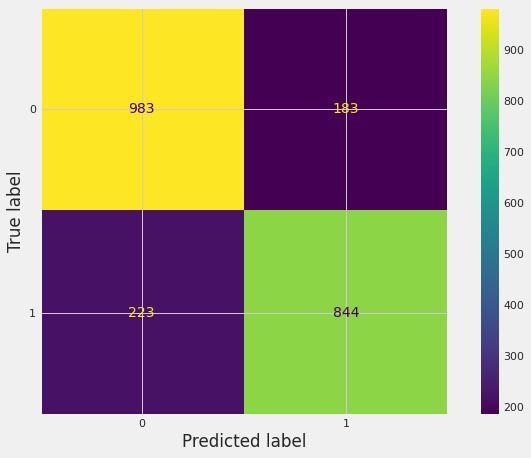

In [91]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = rf_clf_randomcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=rf_clf_randomcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_clf_randomcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

observasi ⤵

*   sebanyak 183 diprediksi deposit tapi sebenarnya tidak deposit
*   sebanyak 223 diprediksi tidak deposit tapi sebenarnya deposit
</br></br>
*   true positif/berhasil memprediksi deposit = 844
*   true negatif/berhasil memprediksi tidak deposit = 983 
*   false positif/deposit yg tidak berhasil diprediksi  = 183
*   false negatif/tidak deposit yg tidak berhasil diprediksi = 223


In [92]:
# classification report
pred = rf_clf_randomcv.best_estimator_.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1166
           1       0.82      0.79      0.81      1067

    accuracy                           0.82      2233
   macro avg       0.82      0.82      0.82      2233
weighted avg       0.82      0.82      0.82      2233



Recall dan precision (79 % dan 82%) hati-hati overfitting, cek lagi

#Kesimpulan</br>
*   model terbaik K-NN dan Random Forest, karena dua model ini berhasil memprediksi yang benar-benar akan term deposit paling tinggi serta menghindari model Decision Tree yang biasanya cendrung overfit</br>

*   sehingga dengan model yang lebih peka terhadap orang yang akan melakukan term deposit maka kampanye marketing dapat lebih maksimal dilakukan  dengan mendekati orang-orang yang memiliki kriteria atau cendrung melakukan term deposit dgn berbagai metode marketing yang sesuai.</br> 

*   namun untuk perhitungan yang lebih cepat sebaiknya saya melakukan data scaling dan agar beban perhitungan lebih murah.</br>

*   Pada beberapa literatur dijelaskan bahwa outliers akan berpengaruh pada klasifikasi, dengan mengolah outlier(dihapus/metode lainnya) akan meningkatkan akurasi dari model klasifikasi algoritme kNN, namun syangnya penulis belum mampu untuk menerapkan metode tersbut, untuk metode penghapusan outlier penulis rasa kurang tepat dilakukan karena dataset yg digunakan akan berkurang sangat bnyak nantinya.

# Rekomendasi untuk Marketing Dept

demi tercapatinya peningkatan pelanggan yg melakukan term deposit, maka pertimbangkan beberapa hal sebagai berikut :</br>
*   Pertimbangkan untuk malakukan kampanye pada usia 30 an.
*   Pertimbangkan untuk malakukan kampanye pada pasangan yang tidak bercerai.
*   Pertimbangkan untuk melakukan kampanye pada pelanggan yang tidak memiliki Loans(Pinjaman) serta menghindari pelanggan yg memiliki pinjaman.</br>
*   Pertimbangkan untuk melihat tingkat saldo pada setiap profesi, usahakan untuk lebih banyak mendekati pelanggan yg bekerja di rana management.</br>
*   Tidak disarankan untuk campaign (menghubungi) pelanggan terlalu sering, karena semakin banyak menghubungi(melakukan kampanye/iklan) kepada pelanggan maka kesempatan utk pelanggan tersebut melakukan term deposit semakin mengecil.


